# CS584 Extra Credit

### David Fu

In [30]:
import numpy as np
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Concatenate, Dense, GRU, Dot, Activation, Concatenate, Dropout, SimpleRNN
from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model

from tensorflow.keras import optimizers

from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import sentence_bleu

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

#### Text Clean Up and Tokenizer

In [2]:
def read_input(input_path:str) -> str:
    file_data = open(input_path , 'rt')   
    return file_data.read()

def clean_text(text:str):
    clean = re.sub('[\W_]+', ' ', text.lower())
    clean = re.sub('[\d]+', ' ', clean)
    return re.sub(' +', ' ', clean)

def line_break_tokenizer(input_text:str):
    return input_text.split('\n')

In [3]:
# Load the data from the txt file

english = './es-en/europarl-v7.es-en.en'
spanish = './es-en/europarl-v7.es-en.es'

en_data = line_break_tokenizer(read_input(english))
es_data = line_break_tokenizer(read_input(spanish))
print(len(en_data))
print(len(es_data))

1965735
1965735


In [64]:
target_token_index

{' ': 1,
 'e': 2,
 'a': 3,
 'o': 4,
 's': 5,
 'n': 6,
 'r': 7,
 'i': 8,
 'l': 9,
 'd': 10,
 't': 11,
 'c': 12,
 'u': 13,
 'p': 14,
 'm': 15,
 'b': 16,
 'g': 17,
 'q': 18,
 'y': 19,
 'ó': 20,
 'v': 21,
 'f': 22,
 'h': 23,
 'í': 24,
 'á': 25,
 'j': 26,
 'z': 27,
 'é': 28,
 'ñ': 29,
 'x': 30,
 'ú': 31,
 'k': 32,
 'w': 33,
 'º': 34,
 'ü': 35,
 'ö': 36,
 'è': 37,
 'ä': 38,
 'ç': 39,
 'ò': 40,
 'č': 41,
 'à': 42,
 'ń': 43,
 'å': 44,
 'ł': 45,
 'ã': 46,
 'ņ': 47,
 'š': 48,
 'ė': 49}

In [65]:

def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, 1, num_decoder_tokens))
    target_seq[0, 0, target_token_index[' ']] = 1.

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        states_value = [h, c]

    return decoded_sentence



In [33]:

def blue_score(input_test_texts, target_test_texts):
    score = 0
    for i, input_sentence in enumerate(input_test_texts):
        input_sequence = text2sequences(len(input_sentence), input_sentence)[0]
        input_x = data_encoder(input_sequence, len(input_sentence), num_encoder_tokens)
        translated_sentence = decode_sequence(input_x)
        reference = translated_sentence.split()
        candidate = target_test_texts[i].split()
        s = sentence_bleu(reference, candidate)
        score += s
    print("Average BLEU score {0:.4f}".format(score / len(input_test_texts)))
    
def blue_score_attention(input_test_texts, target_test_texts):
    score = 0
    for i, input_sentence in enumerate(input_test_texts):
        input_sequence = text2sequences(len(input_sentence), input_sentence)[0]
        input_x = data_encoder(input_sequence, len(input_sentence), num_encoder_tokens)
        translated_sentence = decode_sequence_attention(input_x)
        reference = translated_sentence.split()
        candidate = target_test_texts[i].split()
        s = sentence_bleu(reference, candidate)
        score += s
    print("Average BLEU score {0:.4f}".format(score / len(input_test_texts)))

##### Check Text and Translation

In [4]:
for i in range(0, len(en_data)):
    en_data[i] = clean_text(en_data[i])
    es_data[i] = clean_text(es_data[i])
for i in range(120, 130):    
    print('{' + en_data[i] + '} >>> {' + es_data[i] + '}\n')

{it would be useful for the record of the house to state how people perceive what we have just done in the light of their own political analysis } >>> {sería útil que el historial de la cámara registrara cómo percibe la gente lo que hemos hecho a la luz de sus propios análisis políticos }

{madam president i do not wish to reopen the debate but i had also asked for the floor to comment on mr barón crespo s motion } >>> {señora presidenta no deseo reanudar el debate pero había pedido también la palabra para dar mi opinión acerca de la enmienda del sr barón crespo }

{you did not call me either } >>> {tampoco me ha nombrado usted }

{i regret this but the vote has already been taken and the decision is made so let us leave the matter there } >>> {lo lamento pero la votación se ha realizado se ha adoptado la decisión y por consiguiente dejemos así las cosas }

{i am terribly sorry mr hänsch and mr cox i did not see you asking to speak } >>> {lo siento mucho señor hänsch señor cox no he ad

In [5]:
x_data_1, x_data_2, y_data_1, y_data_2 = train_test_split(en_data, es_data, test_size=0.997, random_state=1219)
x_train, x_2, y_train, y_2 = train_test_split(x_data_1, y_data_1, test_size=0.40, random_state=1219)
x_valid, x_test, y_valid, y_test = train_test_split(x_2, y_2, test_size=0.50, random_state=1219)

In [6]:
print(x_train[1])
print(y_train[1])

print(len(x_train))

mr president we trust europol will be strengthened and that it will fulfil its duties efficiently so that the citizens feel protected this is all perfectly compatible however with the democratic control the house always insists on when the legal status of this instrument for police cooperation is debated 
señor presidente queremos que europol se fortalezca que cumpla sus misiones de manera eficaz para que los ciudadanos se sientan protegidos y esto es perfectamente compatible con el control democrático que viene exigiendo este parlamento en cada ocasión en que se debate sobre el estatus jurídico de este instrumento de cooperación policial 
3538


In [7]:
max_encoder_seq_length = max(len(line) for line in x_train)
max_decoder_seq_length = max(len(line) for line in y_train)
print('max length of input  sentences: %d' % (max_encoder_seq_length))
print('max length of target sentences: %d' % (max_decoder_seq_length))

max length of input  sentences: 1154
max length of target sentences: 1257


##### set up seq2seq encoder and decoder

In [8]:
def text2sequences(max_len, lines):
    tokenizer = Tokenizer(char_level=True, filters='')
    tokenizer.fit_on_texts(lines)
    seqs = tokenizer.texts_to_sequences(lines)
    seqs_pad = pad_sequences(seqs, maxlen=max_len, padding='post')
    return seqs_pad, tokenizer.word_index


encoder_input_seq, input_token_index = text2sequences(max_encoder_seq_length, 
                                                      x_train)
decoder_input_seq, target_token_index = text2sequences(max_decoder_seq_length, 
                                                       y_train)

print('shape of encoder_input_seq: ' + str(encoder_input_seq.shape))
print('shape of input_token_index: ' + str(len(input_token_index)))
print('shape of decoder_input_seq: ' + str(decoder_input_seq.shape))
print('shape of target_token_index: ' + str(len(target_token_index)))

shape of encoder_input_seq: (3538, 1154)
shape of input_token_index: 50
shape of decoder_input_seq: (3538, 1257)
shape of target_token_index: 49


In [9]:
num_encoder_tokens = len(input_token_index) + 1
num_decoder_tokens = len(target_token_index) + 1
print('num_encoder_tokens: ' + str(num_encoder_tokens))
print('num_decoder_tokens: ' + str(num_decoder_tokens))

num_encoder_tokens: 51
num_decoder_tokens: 50


In [10]:
def data_encoder(sequences, max_len, vocab_size):
    n = len(sequences)
    data = np.zeros((n, max_len, vocab_size))
    for i in range(n):
        data[i, :, :] = to_categorical(sequences[i], num_classes=vocab_size)
    return data

encoder_input_data = data_encoder(encoder_input_seq, max_encoder_seq_length, num_encoder_tokens)
decoder_input_data = data_encoder(decoder_input_seq, max_decoder_seq_length, num_decoder_tokens)

decoder_target_seq = np.zeros(decoder_input_seq.shape)
decoder_target_seq[:, 0:-1] = decoder_input_seq[:, 1:]
decoder_target_data = data_encoder(decoder_target_seq, 
                                    max_decoder_seq_length, 
                                    num_decoder_tokens)

print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(3538, 1154, 51)
(3538, 1257, 50)
(3538, 1257, 50)


##### Set Up data traning and Model

In [11]:
latent_dim = 256

encoder_inputs = Input(shape=(None, num_encoder_tokens), 
                       name='encoder_inputs')


encoder_bilstm = Bidirectional(LSTM(latent_dim, return_state=True, 
                                  dropout=0.5, name='encoder_lstm'))
_, forward_h, forward_c, backward_h, backward_c = encoder_bilstm(encoder_inputs)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

encoder_model = Model(inputs=encoder_inputs, 
                      outputs=[state_h, state_c],
                      name='encoder')


In [12]:

decoder_input_h = Input(shape=(latent_dim*2,), name='decoder_input_h')
decoder_input_c = Input(shape=(latent_dim*2,), name='decoder_input_c')
decoder_input_x = Input(shape=(None, num_decoder_tokens), name='decoder_input_x')


decoder_lstm = LSTM(latent_dim*2, return_sequences=True, 
                    return_state=True, dropout=0.5, name='decoder_lstm')
decoder_lstm_outputs, state_h, state_c = decoder_lstm(decoder_input_x, 
                                                      initial_state=[decoder_input_h, decoder_input_c])


decoder_dense = Dense(num_decoder_tokens, activation='softmax', name='decoder_dense')
decoder_outputs = decoder_dense(decoder_lstm_outputs)


decoder_model = Model(inputs=[decoder_input_x, decoder_input_h, decoder_input_c],
                      outputs=[decoder_outputs, state_h, state_c],
                      name='decoder')

In [13]:

encoder_input_x = Input(shape=(None, num_encoder_tokens), name='encoder_input_x')
decoder_input_x = Input(shape=(None, num_decoder_tokens), name='decoder_input_x')


encoder_final_states = encoder_model([encoder_input_x])
decoder_lstm_output, _, _ = decoder_lstm(decoder_input_x, initial_state=encoder_final_states)
decoder_pred = decoder_dense(decoder_lstm_output)

model = Model(inputs=[encoder_input_x, decoder_input_x], 
              outputs=decoder_pred, 
              name='model_training')
model.summary()

Model: "model_training"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_x (InputLayer)    (None, None, 51)     0                                            
__________________________________________________________________________________________________
decoder_input_x (InputLayer)    (None, None, 50)     0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 512), (None, 630784      encoder_input_x[0][0]            
__________________________________________________________________________________________________
decoder_lstm (LSTM)             [(None, None, 512),  1153024     decoder_input_x[0][0]            
                                                                 encoder[1][0]       

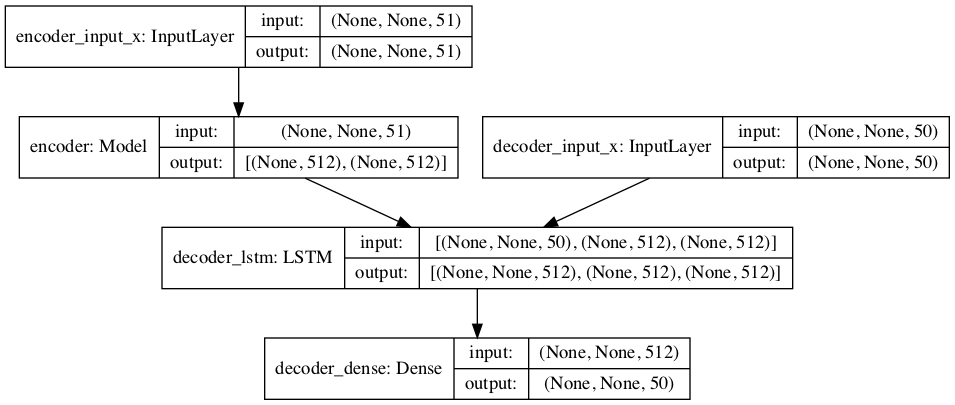

In [14]:

plot_model(model, show_shapes=True, to_file='model_LSTM.png')

In [15]:

model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

history = model.fit([encoder_input_data, decoder_input_data],  # training data
          decoder_target_data,                       # labels (left shift of the target sequences)
          batch_size=128, epochs=10, validation_split=0.2)

model.save('seq2seq.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2830 samples, validate on 708 samples
Epoch 1/10
2830/2830 [==============================] - 631s 223ms/step - loss: 1.2498 - val_loss: 0.5164
Epoch 2/10
2830/2830 [==============================] - 600s 212ms/step - loss: 0.5075 - val_loss: 0.4945
Epoch 3/10
2830/2830 [==============================] - 586s 207ms/step - loss: 0.4794 - val_loss: 0.5078
Epoch 4/10
2830/2830 [==============================] - 585s 207ms/step - loss: 0.4761 - val_loss: 0.4568
Epoch 5/10
2830/2830 [==============================] - 587s 207ms/step - loss: 0.4509 - val_loss: 0.4819
Epoch 6/10
2830/2830 [==============================] - 597s 211ms/step - loss: 0.4396 - val_loss: 0.4225
Epoch 7/10
2830/2830 [==============================] - 595s 210ms/step - loss: 0.4218 - val_loss: 0.3894
Epoch 8/10
2830/2830 [==============================] - 618s 219ms/step - loss: 0.4093 - val_loss: 0.4407
Epoch 9/10

AttributeError: module 'tensorflow.keras.optimizers' has no attribute 'TFOptimizer'

In [ ]:
model.save('seq2seq.h5')

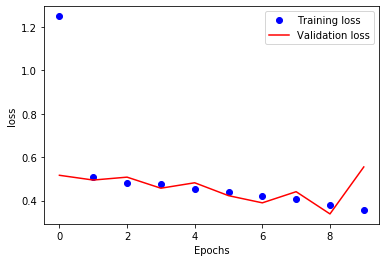

In [25]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
blue_score(x_valid, y_valid)

KeyError: 0

In [40]:
encoder_inputs = Input(shape=(None, num_encoder_tokens), name="Encoder_Input")
encoder = GRU(latent_dim, return_state=True, name="Encoder_GRU")
_, encoder_state = encoder(encoder_inputs)
decoder_inputs = Input(shape=(None, num_decoder_tokens), name="Decoder_Input")
decoder_gru = GRU(latent_dim, return_sequences=True, return_state=True, name="Decoder_GRU")

decoder_outputs, _ = decoder_gru(decoder_inputs, initial_state=encoder_state)

decoder_dense = Dense(num_decoder_tokens, activation='softmax', name="DecoderOutput")
decoder_outputs = decoder_dense(decoder_outputs)

model_GRU = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model_GRU.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_GRU.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Encoder_Input (InputLayer)      [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
Decoder_Input (InputLayer)      [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
Encoder_GRU (GRU)               [(None, 256), (None, 236544      Encoder_Input[0][0]              
__________________________________________________________________________________________________
Decoder_GRU (GRU)               [(None, None, 256),  235776      Decoder_In

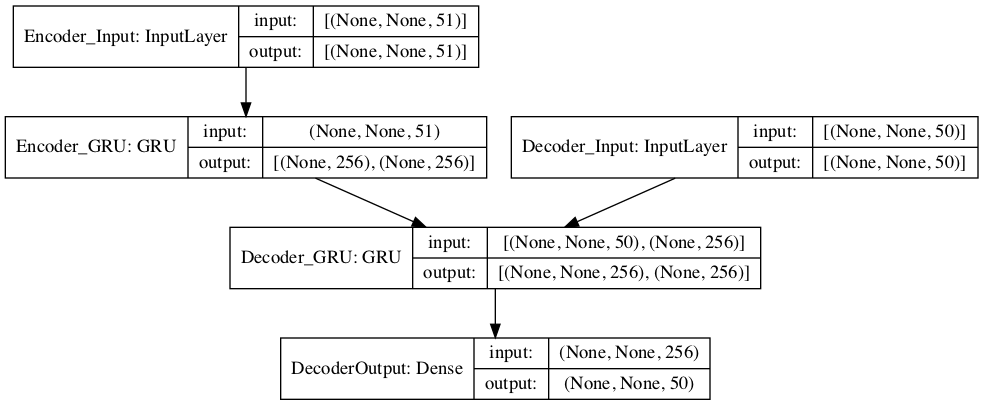

In [41]:

plot_model(model_GRU, show_shapes=True, to_file='model_GRU.png')

In [43]:
history2 = model_GRU.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=64,
          epochs=5,
          validation_split=0.2)

Train on 2830 samples, validate on 708 samples
Epoch 1/5
2830/2830 [==============================] - 636s 225ms/sample - loss: 0.5996 - acc: 0.8915 - val_loss: 1.4576 - val_acc: 0.8926
Epoch 2/5
2830/2830 [==============================] - 584s 206ms/sample - loss: 0.4074 - acc: 0.8948 - val_loss: 0.3637 - val_acc: 0.8945
Epoch 3/5
2830/2830 [==============================] - 576s 203ms/sample - loss: 0.3420 - acc: 0.9036 - val_loss: 0.3283 - val_acc: 0.9067
Epoch 4/5
2830/2830 [==============================] - 581s 205ms/sample - loss: 0.2992 - acc: 0.9133 - val_loss: 0.2874 - val_acc: 0.9144
Epoch 5/5
2830/2830 [==============================] - 573s 202ms/sample - loss: 0.2708 - acc: 0.9187 - val_loss: 0.2685 - val_acc: 0.9185


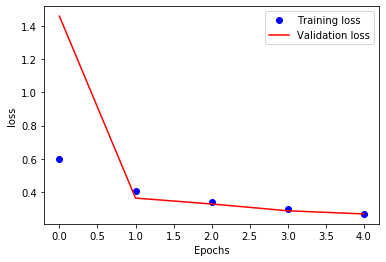

In [44]:

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

##### Check BLUE Score

In [45]:

blue_score(input_val_texts, target_val_texts)

NameError: name 'input_val_texts' is not defined

In [46]:
latent_dim = 256


encoder_inputs = Input(shape=(None, num_encoder_tokens), 
                       name='encoder_inputs')

encoder_RNN = SimpleRNN(latent_dim, return_state=True, 
                    dropout=0.5, name='encoder_RNN')
state_h, state_c = encoder_RNN(encoder_inputs)

encoder_model_RNN = Model(inputs=encoder_inputs, 
                      outputs=[state_h, state_c],
                      name='encoder')

decoder_input_h = Input(shape=(latent_dim,), name='decoder_input_h')
decoder_input_c = Input(shape=(latent_dim,), name='decoder_input_c')
decoder_input_x = Input(shape=(None, num_decoder_tokens), name='decoder_input_x')

decoder_lstm = LSTM(latent_dim, return_sequences=True, 
                    return_state=True, dropout=0.5, name='decoder_RNN')
decoder_lstm_outputs, state_h, state_c = decoder_lstm(decoder_input_x, 
                                                      initial_state=[decoder_input_h, decoder_input_c])

decoder_dense = Dense(num_decoder_tokens, activation='softmax', name='decoder_dense')
decoder_outputs = decoder_dense(decoder_lstm_outputs)


decoder_model_RNN = Model(inputs=[decoder_input_x, decoder_input_h, decoder_input_c],
                      outputs=[decoder_outputs, state_h, state_c],
                      name='decoder')

encoder_input_x = Input(shape=(None, num_encoder_tokens), name='encoder_input_x')
decoder_input_x = Input(shape=(None, num_decoder_tokens), name='decoder_input_x')

encoder_final_states = encoder_model_RNN([encoder_input_x])
decoder_lstm_output, _, _ = decoder_lstm(decoder_input_x, initial_state=encoder_final_states)
decoder_pred = decoder_dense(decoder_lstm_output)

model_SimpleRNN = Model(inputs=[encoder_input_x, decoder_input_x], 
              outputs=decoder_pred, 
              name='model_training')
model_SimpleRNN.summary()

Model: "model_training"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_x (InputLayer)    [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
decoder_input_x (InputLayer)    [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 256), (None, 78848       encoder_input_x[0][0]            
__________________________________________________________________________________________________
decoder_RNN (LSTM)              [(None, None, 256),  314368      decoder_input_x[0][0]            
                                                                 encoder[1][0]       

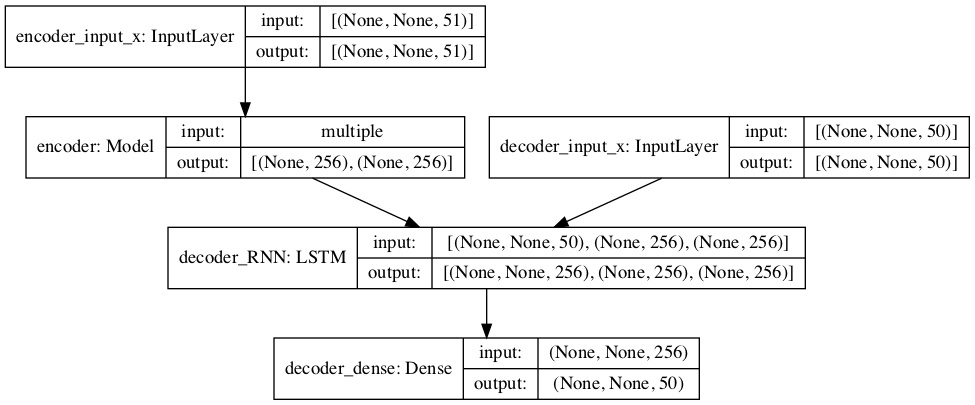

In [47]:
plot_model(model_SimpleRNN, show_shapes=True, to_file='model_SimpleRNN.png')

In [49]:
model_SimpleRNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model_SimpleRNN.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

Train on 2830 samples, validate on 708 samples
2830/2830 [==============================] - 463s 164ms/sample - loss: 0.7192 - acc: 0.8715 - val_loss: 0.4112 - val_acc: 0.8878


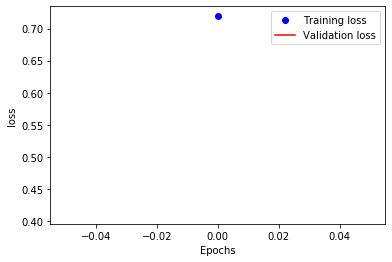

In [50]:

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

##### Validation

In [54]:

blue_score(x_valid, y_valid)

KeyError: '\t'

In [52]:
latent_dim = 256
encoder_inputs = Input(shape=(None, num_encoder_tokens))
x_encoder, _, _, _, _ = Bidirectional(LSTM(latent_dim,return_sequences=True, return_state=True))(encoder_inputs)
x_encoder = Dropout(0.5)(x_encoder)
x_encoder, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(latent_dim,return_sequences=True, return_state=True))(encoder_inputs)
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
x_encoder = Dropout(0.5)(x_encoder)



decoder_inputs = Input(shape=(None, num_decoder_tokens))

x_decoder = LSTM(latent_dim*2,return_sequences=True)(decoder_inputs)
x_decoder = Dropout(0.5)(x_decoder)

# Attention
attention = Dot(axes=[2, 2])([x_decoder, x_encoder])
attention = Activation('softmax')(attention)

context = Dot(axes=[2, 1])([attention, x_encoder])
decoder_combined_context = Concatenate(axis=-1)([context, x_decoder])
x_decoder = LSTM(int(latent_dim/2),return_sequences=True)(x_decoder)
x_decoder = Dropout(0.5)(x_decoder)
# Output
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_combined_context)

model_attention = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model_attention .summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (No

In [53]:
plot_model(model_attention, show_shapes=True, to_file='model_attention.png')

TypeError: 'InputLayer' object is not iterable

In [ ]:
model_attention.compile(optimizer='rmsprop', loss='categorical_crossentropy')

history4 = model_attention.fit([encoder_input_data, decoder_input_data],  # training data
          decoder_target_data,                       # labels (left shift of the target sequences)
          batch_size=128, epochs=1, validation_split=0.2)

In [ ]:

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [57]:

def decode_sequence_attention(input_seq):
    states_value = encoder_model_RNN.predict(input_seq)

    target_seq = np.zeros((1, 1, num_decoder_tokens))
    target_seq[0, 0, target_token_index['\t']] = 1.

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model_RNN.predict([target_seq] + states_value)

        # this line of code is greedy selection
        # try to use multinomial sampling instead (with temperature)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        states_value = [h, c]

    return decoded_sentence

In [ ]:
blue_score(input_test_texts, target_test_texts)

In [ ]:
blue_score_attention(input_test_texts, target_test_texts)

In [67]:
for seq_index in range(1000,1020):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    decode_sequence_R = decode_sequence_attention(input_seq)
    print('-'*40)
    print('English:       ', input_texts[seq_index])
    print('Spanish (true): ', target_texts[seq_index][1:-1])
    print('Spanish (pred): ', decoded_sentence[0:-1])
    print('Spanish (pred_attention):', decode_sequence_R[0:-1])

KeyError: 0